In [1]:
print("Notebook initialized cleanly")


Notebook initialized cleanly


## Data loading and inspection

In [126]:
import pandas as pd

In [127]:
# Loading dataset
file_path = r"C:\Users\wwwsu\Desktop\All folders\data-screening-exercise\data\messy_ice_detention.csv"
df = pd.read_csv(file_path, header=None, encoding='latin1')
df.head()

,0,1,2,3,4,5,6,7
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,These statistics are made available to the pub...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ICE FACILITIES DATA, FY25",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ICE Enforcement and Removal Operations Data, F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,This list is limited to facilities that have a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First 6 rows are only the metadata that has be arranged in dataframe, which should be removed just to keep usable data in the dataset.

In [128]:
# Removing first 6 rows
df = df.iloc[6:].reset_index(drop=True)
df.head()

,0,1,2,3,4,5,6,7
0,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
1,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
2,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
3,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
4,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533


First row is still not the header of dataframe. It should be converted to header.


In [129]:
# Setting first row as header
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NaN


### Data cleaning 

In [130]:
# Removing unecessary special charaters from 'Name' cloumn 
df['Name'] = df['Name'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip()
df.head(10)

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NaN
5,ALLEN PARISH PUBLIC SAFETY COMPLEX,OBERLIN,LA,101.3113772,30.25149701,33.76646707,10.66467066,45638
6,ATLANTA US PEN,ATLANTA,,17.34131737,3.610778443,3.053892216,2.724550898,NaN
7,BAKER COUNTY SHERIFF DEPT,MACCLENNY,FL,26.22155689,38.64071856,88.65269461,88.73053892,45589
8,BERLIN FED CORR INST,BERLIN,NH,1.748502994,8.98E-02,0.97005988,0.71257485,NaN
9,BLUEBONNET DETENTION FACILITY,ANSON,TX,311.3053892,164.5508982,241.6167665,104.5149701,45638


In [131]:
# Identifying blanks cell in 'Name' column 
blanks_names = df['Name'] == ''
df[blanks_names]

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
116,,ELK RIVER,MN,4.592814371,5.598802395,9.281437126,2.760479042,45414
123,,DOVER,NH,0,0,49.16167665,41.33532934,45547


Here, taking city and state as reference and reconciling it with the clean data that is available in webpage which is mentioned in the instruction pdf; blanks in the name is needed to be replaced by searching manually. 

* 116 index is SHERBURNE COUNTY JAIL
* 123 index is STE. GENEVIEVE COUNTY SHERIFF/JAIL


In [132]:
# Manually filling the verified facilities name
df.loc[116,'Name' ] = 'SHERBURNE COUNTY JAIL'
df.loc[123,'Name' ] = 'STE. GENEVIEVE COUNTY SHERIFF/JAIL'


In [133]:
# Checking the manually updated rows
df.loc[[116, 123], ['Name', 'City', 'State']]



,Name,City,State
116,SHERBURNE COUNTY JAIL,ELK RIVER,MN
123,STE. GENEVIEVE COUNTY SHERIFF/JAIL,DOVER,NH


In [134]:
df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NaN


In [135]:
df.dtypes

0
Name                        object
City                        object
State                       object
Level A                     object
Level B                     object
Level C                     object
Level D                     object
Last Inspection End Date    object
dtype: object

In [136]:
# Converting Last Inspection End Date to numeric 
df['Last Inspection End Date'] = pd.to_numeric(df['Last Inspection End Date'], errors='coerce')
df['Last Inspection End Date'].dtype

dtype('float64')

In [137]:
df.dtypes

0
Name                         object
City                         object
State                        object
Level A                      object
Level B                      object
Level C                      object
Level D                      object
Last Inspection End Date    float64
dtype: object

In [138]:
# Create a mask for numeric values
numeric_mask = df['Last Inspection End Date'].notna()

# Convert only numeric values (Excel serial numbers) to datetime
df.loc[numeric_mask, 'Last Inspection End Date'] = pd.to_datetime(
    df.loc[numeric_mask, 'Last Inspection End Date'],
    origin='1899-12-30',
    unit='D'
).dt.date

C:\Users\wwwsu\AppData\Local\Temp\ipykernel_30512\2920677887.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.date(2025, 1, 16) datetime.date(2024, 7, 18)
 datetime.date(2024, 9, 19) datetime.date(2024, 8, 29)
 datetime.date(2024, 12, 12) datetime.date(2024, 10, 24)
 datetime.date(2024, 12, 12) datetime.date(2024, 11, 21)
 datetime.date(2024, 12, 19) datetime.date(2024, 10, 31)
 datetime.date(2021, 4, 2) datetime.date(2024, 8, 22)
 datetime.date(2024, 7, 11) datetime.date(2024, 12, 12)
 datetime.date(2025, 1, 9) datetime.date(2024, 8, 22)
 datetime.date(2024, 4, 25) datetime.date(2025, 2, 27)
 datetime.date(2024, 6, 27) datetime.date(2025, 1, 16)
 datetime.date(2024, 6, 6) datetime.date(2025, 2, 6)
 datetime.date(2024, 12, 5) datetime.date(2024, 9, 12)
 datetime.date(2024, 12, 7) datetime.date(2024, 7, 18)
 datetime.date(2025, 2, 13) datetime.date(2024, 3, 14)
 datetime.date(2025, 2, 27) datetime.date(

In [139]:
df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,2024-09-19
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NaN


Last Inspection End date previously had object datatype which is converted to numeric and into date format afterwards where NaN values remain untouched.

In [141]:
# Observing and cleaning levels to ultimately find the total population 

# Listing the level columns
level_columns = ['Level A', 'Level B', 'Level C', 'Level D']
df[level_columns] = df[level_columns].apply(pd.to_numeric, errors='coerce')
df[level_columns].dtypes

0
Level A    float64
Level B    float64
Level C    float64
Level D    float64
dtype: object

In [142]:
# Checking if there is presence of any nagative values in level 
negative_values = df[level_columns] < 0
df[negative_values.any(axis=1)] 

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date


Level is converted to numeric value. No negative values that can deflect the total population is found. Also values with scientific notation are converted to simple numeric number during numeric conversion.

In [145]:
# Finalizing cleaning of dataset by checking if there is any uneven or missing values in in city and state columns

# Strip any extra whitespace
df['City'] = df['City'].str.strip()
df['State'] = df['State'].str.strip()


In [146]:
df[['City', 'State']].isna().sum()


0
City     0
State    0
dtype: int64

Dataset is cleaned properly and it is ready to analyze.

### Data Analyzing

In [147]:
# Adding new column name Total populataion which is the sum of all levels
df['Total Population'] = df[level_columns].sum(axis=1)

In [148]:
df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,Total Population
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16,2153.874252
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18,65.964072
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19,20.059880
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29,313.425150
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaN,1.239557


In [150]:
# Subsetting top 10 facilities by Total Population
top_10_facilities = df.nlargest(10, 'Total Population')
top_10_facilities[['Name', 'City', 'State', 'Total Population']]

,Name,City,State,Total Population
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,2153.874252
119,SOUTH TEXAS ICE PROCESSING CENTER,PEARSALL,TX,1662.131736
122,STEWART DETENTION CENTER,LUMPKIN,GA,1637.844311
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1509.383233
93,OTAY MESA DETENTION CENTER,SAN DIEGO,CA,1362.640719
41,ELOY FEDERAL CONTRACT FACILITY,ELOY,AZ,1327.724551
83,MOSHANNON VALLEY PROCESSING CENTER,PHILIPSBURG,PA,1246.047904
82,MONTGOMERY ICE PROCESSING CENTER,CONROE,TX,1227.227545
18,CENTRAL LOUISIANA ICE PROCESSING CENTER CLIPC,JENA,LA,1184.131736
31,DENVER CONTRACT DETENTION FACILITY,AURORA,CO,1146.101796


Total population is calculated and top 10 facilities by population is fetched.

In [152]:
# Saving this analyzed result in outputs folder.
top_10_facilities.to_csv(r'C:\Users\wwwsu\Desktop\All folders\data-screening-exercise\outputs/top_10_ice_detention_facilities.csv', index=False)

A clean and analyzed csv of top 10 facilities is saved in outputs folder. 

### Data Visualization

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\wwwsu\AppData\Local\Temp\ipykernel_30512\1340303403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


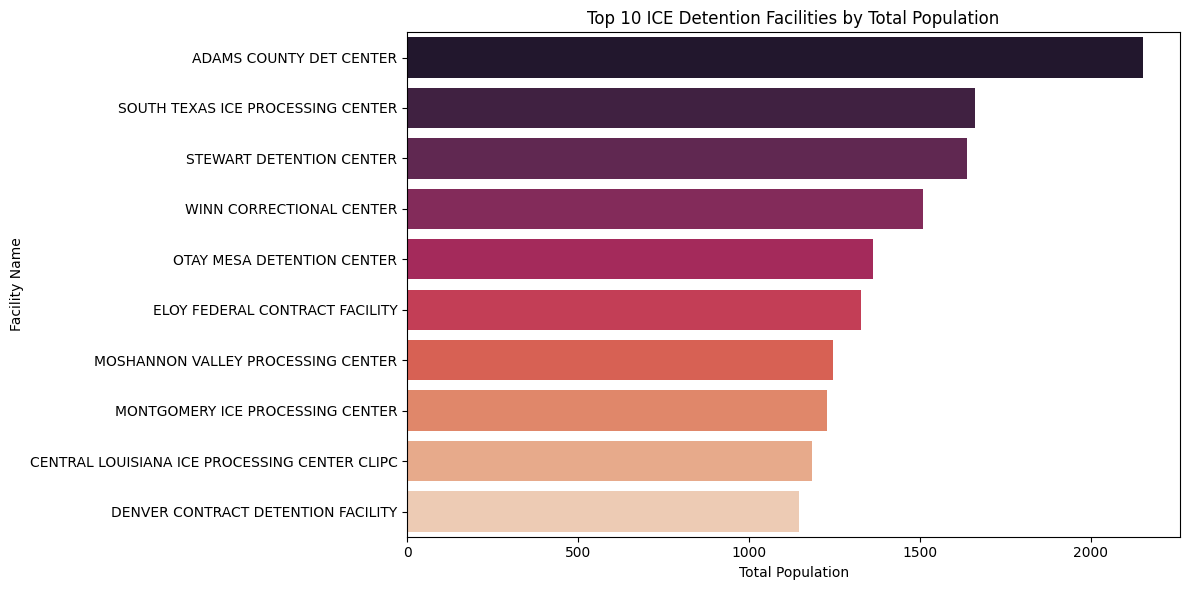

In [157]:
# Creating a bar plot for top 10 facilities by Total Population
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_facilities,
    y='Name',
    x='Total Population',
    palette='rocket'
)
plt.xlabel('Total Population')
plt.ylabel('Facility Name') 
plt.title('Top 10 ICE Detention Facilities by Total Population')
plt.tight_layout()  

# Save the plot in outputs folder
plt.savefig(r'C:\Users\wwwsu\Desktop\All folders\data-screening-exercise\outputs/top_10_ice_detention_facilities_plot.png')
plt.show()

Visualization of top 10 facilities by population is done using horizontal bar chart to avoid overlappping of facilities name and bar chart is saved in outputs folder.